In [1]:
# Data Drift Impact on Model
# Question: Use a simple linear regression model to demonstrate how data drift affects model predictions.

# 1. Train a model on the original data:
# 2. Evaluate on the drifted data:
# 3. Compare errors:




Mean Squared Error on original data: 0.807
Mean Squared Error on drifted data: 121.602


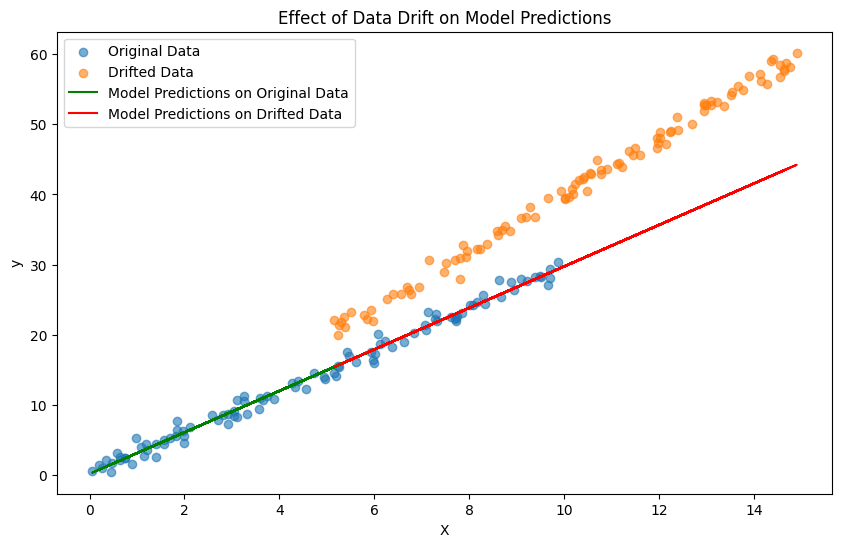

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate original data (linear relationship y = 3x + noise)
np.random.seed(42)
X_original = np.random.uniform(0, 10, 100).reshape(-1, 1)
noise = np.random.normal(0, 1, 100)
y_original = 3 * X_original.flatten() + noise

# Train linear regression on original data
model = LinearRegression()
model.fit(X_original, y_original)

# Predictions on original data
y_pred_original = model.predict(X_original)
mse_original = mean_squared_error(y_original, y_pred_original)

# 2. Create drifted data (shifted input distribution + changed slope)
X_drifted = np.random.uniform(5, 15, 100).reshape(-1, 1)  # shifted range
y_drifted = 4 * X_drifted.flatten() + np.random.normal(0, 1, 100)  # different slope

# Evaluate model on drifted data
y_pred_drifted = model.predict(X_drifted)
mse_drifted = mean_squared_error(y_drifted, y_pred_drifted)

# 3. Compare errors
print(f"Mean Squared Error on original data: {mse_original:.3f}")
print(f"Mean Squared Error on drifted data: {mse_drifted:.3f}")

# Visualize results
plt.figure(figsize=(10,6))
plt.scatter(X_original, y_original, label="Original Data", alpha=0.6)
plt.scatter(X_drifted, y_drifted, label="Drifted Data", alpha=0.6)
plt.plot(X_original, y_pred_original, color='green', label="Model Predictions on Original Data")
plt.plot(X_drifted, y_pred_drifted, color='red', label="Model Predictions on Drifted Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Effect of Data Drift on Model Predictions")
plt.legend()
plt.show()


In [3]:
import numpy as np
import pandas as pd

# Simulate original data
np.random.seed(42)
original_data = pd.DataFrame({
    'feature1': np.random.normal(50, 5, 1000),
    'feature2': np.random.uniform(0, 100, 1000),
    'feature3': np.random.exponential(1, 1000)
})

# Simulate drifted data with changed distributions
drifted_data = pd.DataFrame({
    'feature1': np.random.normal(55, 7, 1000),  # mean and std changed
    'feature2': np.random.uniform(0, 100, 1000),  # no change
    'feature3': np.random.exponential(1.5, 1000)  # scale changed
})

# 1. Calculate statistics for both datasets
def calculate_stats(df):
    return pd.DataFrame({
        'mean': df.mean(),
        'std': df.std()
    })

original_stats = calculate_stats(original_data)
drifted_stats = calculate_stats(drifted_data)

# 2. Compare statistics and calculate relative change
comparison = original_stats.copy()
comparison['mean_drift'] = (drifted_stats['mean'] - original_stats['mean']).abs() / original_stats['mean']
comparison['std_drift'] = (drifted_stats['std'] - original_stats['std']).abs() / original_stats['std']

# 3. Set thresholds to detect drift (e.g., 10% change)
threshold = 0.10

# Identify features with significant drift
comparison['mean_drift_flag'] = comparison['mean_drift'] > threshold
comparison['std_drift_flag'] = comparison['std_drift'] > threshold

print("Feature drift comparison:\n")
print(comparison)

# Summary of features flagged for drift
drifted_features = comparison[(comparison['mean_drift_flag']) | (comparison['std_drift_flag'])]
print("\nFeatures with potential drift detected:")
print(drifted_features.index.tolist())


Feature drift comparison:

               mean        std  mean_drift  std_drift  mean_drift_flag  \
feature1  50.096660   4.896080    0.098896   0.468921            False   
feature2  50.364881  28.835684    0.011510   0.000941            False   
feature3   0.973252   0.945325    0.564048   0.643379             True   

          std_drift_flag  
feature1            True  
feature2           False  
feature3            True  

Features with potential drift detected:
['feature1', 'feature3']


In [4]:
# Monitoring Data Distribution Changes
# Question: Use Python to monitor distribution changes in features to detect potential data drift.

# 1. Calculate feature statistics (mean and standard deviation) for both original and drifted data:
# 2. Compare statistics:
# 3. Set thresholds to detect significant drift:




In [5]:
# Automating Data Quality Checks with Python
# Question: Automate a basic data validation process using Python to ensure the dataset's
# structural integrity.

# 1. Define validation checks:
# 2. Apply validation:




In [6]:
# Introducing Great Expectations for Data Validation
# Question: Use Great Expectations to set up data validation checks for a dataset.

# 1. Install Great Expectations:
# 2. Create a new expectations suite:
# 3. Load data and generate expectations:




In [7]:
# Automating Constraint Checks with Python
# Question: Automate primary key and foreign key constraint checks using Python to ensure dataset compliance.


# 1. Assuming datasets exist with primary and foreign key relationships in pandas dataframes employees_df and departments_df :




In [8]:
# Advanced Data Drift Detection using Statistical Tests
# Question: Implement Kolmogorov-Smirnov test using Python to detect data drift at a more sophisticated level.

# 1. Use SciPy to perform KS test:


